# ***Data Loading and Cleaning***

In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_excel("/content/New-york-city-bike-raw-data.xlsx")

In [4]:
data.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday


In [6]:
# Check MISSING values
data.isna().sum()

,0
Start Time,0
Stop Time,0
Start Station ID,0
Start Station Name,0
End Station ID,0
End Station Name,1
Bike ID,0
User Type,0
Birth Year,0
Age,0


In [7]:
# Check DUPLICATE values
data.duplicated().sum()

3555

In [8]:
# Drop rows with MISSING values
data_cleaned = data.dropna()

In [10]:
# Remove DUPLICATEs by dropping duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

In [12]:
# Save the cleaned data to a new Excel file
cleaned_file_path = '/content/Cleaned_Data.xlsx'
data_cleaned.to_excel(cleaned_file_path, index=False)

# ***EDA(Exploratory Data Analysis)***

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned Excel file
file_path = '/content/Cleaned_Data.xlsx'
NY_data = pd.read_excel(file_path)

In [14]:
# Descriptive statistics for numerical columns
print(NY_data.describe())

# Summary for categorical columns
print(NY_data.describe(include=['object']))

                          Start Time                      Stop Time  \
count                          16844                          16844   
mean   2017-02-19 21:12:05.218475520  2017-02-19 21:21:40.693422080   
min              2017-01-01 00:38:00            2017-01-01 01:03:00   
25%              2017-01-29 18:06:15            2017-01-29 18:09:30   
50%              2017-02-23 18:05:00            2017-02-23 18:13:00   
75%              2017-03-09 18:24:00            2017-03-09 18:30:15   
max              2017-03-31 23:20:00            2017-03-31 23:30:00   
std                              NaN                            NaN   

       Start Station ID  End Station ID       Bike ID    Birth Year  \
count      16844.000000    16844.000000  16844.000000  16844.000000   
mean        3215.886072     3211.575576  25292.898599   1979.304263   
min         3183.000000      152.000000  15084.000000   1931.000000   
25%         3186.000000     3186.000000  24523.000000   1974.000000   
50%  

<ipython-input-16-a98d369d13d7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickup.values, y=top_pickup.index, palette="Blues_r")
<ipython-input-16-a98d369d13d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dropoff.values, y=top_dropoff.index, palette="Greens_r")


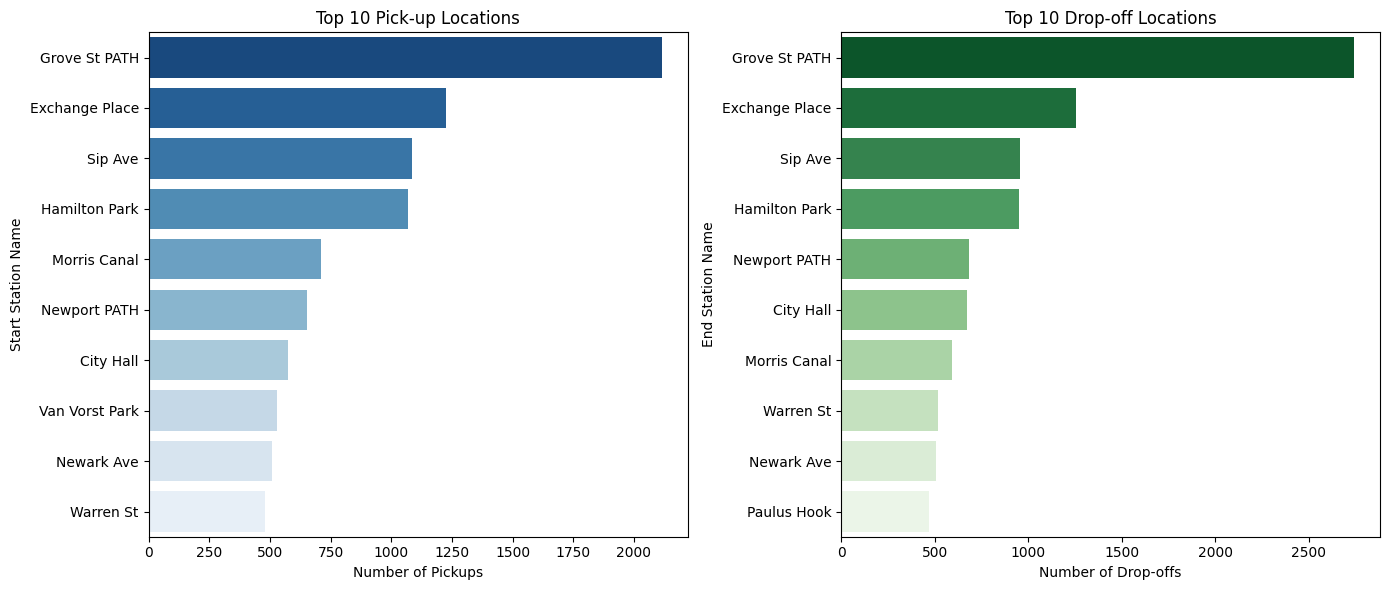

In [16]:
# Count occurrences of each station as a Start and End location
top_pickup = NY_data["Start Station Name"].value_counts().nlargest(10)
top_dropoff = NY_data["End Station Name"].value_counts().nlargest(10)

plt.figure(figsize=(14, 6))

# Plot Pickup locations
plt.subplot(1, 2, 1)
sns.barplot(x=top_pickup.values, y=top_pickup.index, palette="Blues_r")
plt.xlabel("Number of Pickups")
plt.ylabel("Start Station Name")
plt.title("Top 10 Pick-up Locations")

# Plot Drop-off locations
plt.subplot(1, 2, 2)
sns.barplot(x=top_dropoff.values, y=top_dropoff.index, palette="Greens_r")
plt.xlabel("Number of Drop-offs")
plt.ylabel("End Station Name")
plt.title("Top 10 Drop-off Locations")

plt.tight_layout()
plt.show()

<ipython-input-17-1a3a80344a3a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_duration, x='Age Groups', y='Trip_Duration_in_min', palette='coolwarm')


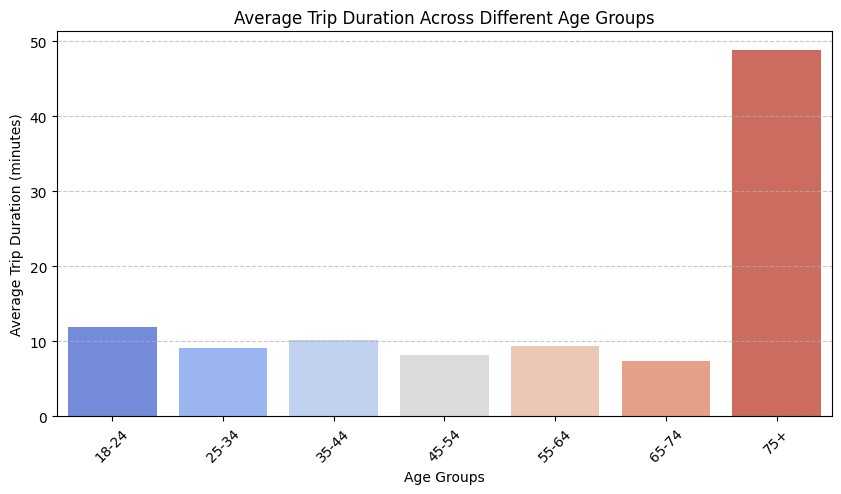

In [17]:
# Convert 'Trip_Duration_in_min' to numeric
NY_data['Trip_Duration_in_min'] = pd.to_numeric(NY_data['Trip_Duration_in_min'], errors='coerce')

# Group by Age Groups and calculate the mean trip duration
age_group_duration = NY_data.groupby('Age Groups')['Trip_Duration_in_min'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=age_group_duration, x='Age Groups', y='Trip_Duration_in_min', palette='coolwarm')

# Customizations
plt.xlabel('Age Groups')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration Across Different Age Groups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<ipython-input-19-e30710246738>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")


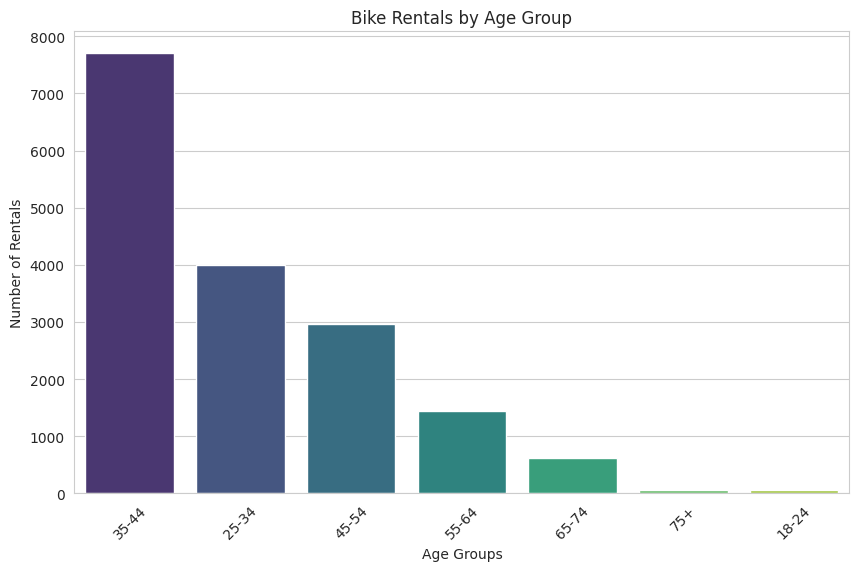

In [19]:
# Count bike rentals by age group
age_group_counts = NY_data["Age Groups"].value_counts().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")

# Customize the plot
plt.xlabel("Age Groups")
plt.ylabel("Number of Rentals")
plt.title("Bike Rentals by Age Group")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

<ipython-input-20-22211db7b0f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='coolwarm')


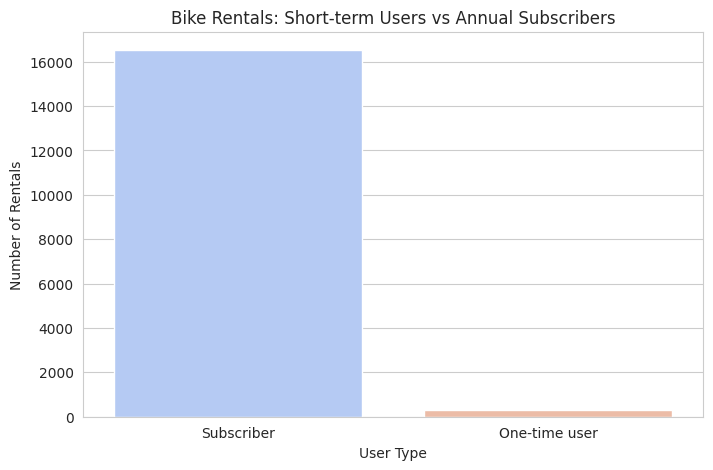

In [20]:
# Count bike rentals by user type
user_type_counts = NY_data['User Type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='coolwarm')

# Add labels
plt.xlabel("User Type")
plt.ylabel("Number of Rentals")
plt.title("Bike Rentals: Short-term Users vs Annual Subscribers")
plt.xticks(rotation=0)

# Show the plot
plt.show()

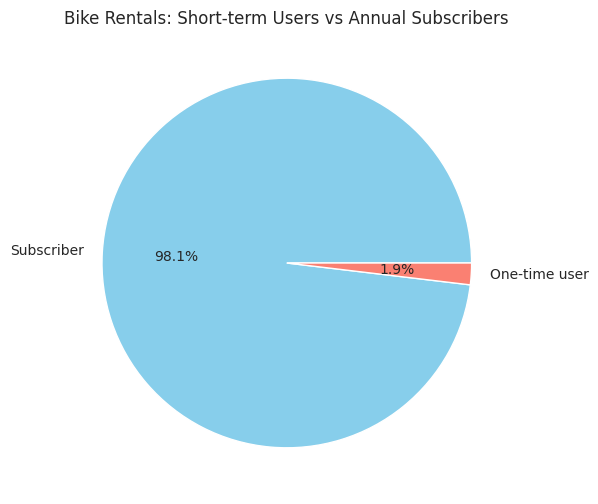

In [21]:
plt.figure(figsize=(6, 6))
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Bike Rentals: Short-term Users vs Annual Subscribers")
plt.show()